### 2.1 RANDOMIZED PLAY

In [321]:
import numpy as np

def randomized_play(matrix, row_distribution, col_distribution):
    
    expected_loss = row_distribution @ matrix @ col_distribution.T
    return expected_loss

# (가위, 바위, 보)
matrix = np.array([[0.5, 1, 0], 
                   [0, 0.5, 1], 
                   [1, 0, 0.5]])

row_distribution = np.array([0.33, 0.33, 0.34]) 
col_distribution = np.array([0.33, 0.33, 0.34])

# 예상 손실 계산
expected_loss = randomized_play(matrix, row_distribution, col_distribution)
print(f"예상 손실: {expected_loss}")


예상 손실: 0.5


### 2.4 REPEATED PLAY

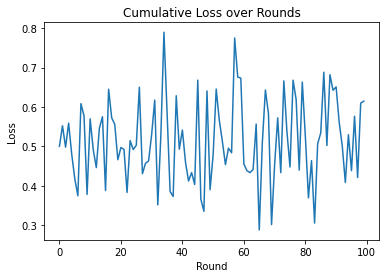

평균 loss:  0.5144654001939736


In [380]:
import numpy as np

def repeated_play(M, T, beta):
    """
    Simulates the repeated play algorithm.

    Args:
    M (np.array): The loss matrix (n x n).
    T (int): Number of rounds.
    beta (float): Parameter for updating the weights.

    Returns:
    losses (list): List of cumulative losses at each round.
    strategies (list): List of mixed strategies used by the learner.
    """
    n = M.shape[0]
    weights = np.ones(n)
    losses = []
    strategies = []
    
    for t in range(T):
        # Normalize weights to get mixed strategy P_t
        P_t = weights / np.sum(weights)
        strategies.append(P_t.copy())

        # Simulate the environment's strategy Q_t (randomized for this example)
        Q_t = np.random.dirichlet(np.ones(n))
        # Calculate the loss for each row strategy i
        losses_i = np.dot(M, Q_t)

        # Update weights based on losses
        weights *= beta ** losses_i

        # Calculate the learner's loss for this round
        loss_t = np.dot(P_t, losses_i)
        losses.append(loss_t)

    return losses, strategies

# Example usage:
M = np.array([[0.5, 1, 0],
            [0, 0.5, 1],
            [1, 0, 0.5]])

T = 100  # Number of rounds
beta = 0.3  # Parameter for updating weights

losses, strategies = repeated_play(M, T, beta)

import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Round')
plt.ylabel('Loss')
plt.title('Cumulative Loss over Rounds')
plt.show()

print("평균 loss: ",np.mean(losses))

### 3 Online PREDICTION

In [320]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def online_prediction(X, y, hypotheses, beta):
    n_hypotheses = len(hypotheses)
    n_instances = len(X)
    weights = np.ones(n_hypotheses)  # Initailize the hypothesis weighs
    total_mistakes = 0
    total_predictions = []
    for t in range(T):  # predict every instacnes
        instance = X[t]
        correct_label = y[t]

        # Normalization weights = P_t
        P_t = weights / weights.sum()

        predictions = [hypothesis(instance) for hypothesis in hypotheses]

        # Choose hypothesis by P_t
        chosen_hypothesis_ind = np.random.choice(len(hypotheses), p=P_t)
        predicted_label = predictions[chosen_hypothesis_ind]
        # update weights
        for j in range(n_hypotheses):
            if predictions[j] != correct_label:
                weights[j] *= beta

        if predicted_label != correct_label:
            total_mistakes += 1

        # 인스턴스 예측 후 바로 가중치를 정규화하여 Pt 업데이트
        weights = weights / weights.sum()
        total_predictions.append(predicted_label)


    return total_mistakes, total_predictions

data = load_iris()
X = data.data
y = (data.target != 0).astype(int)  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Simple hypothesis
def hypothesis_1(instance):
    return 1 if instance[0] > 5 else 0  

def hypothesis_2(instance):
    return 1 if instance[1] > 3 else 0  

def hypothesis_3(instance):
    return 1 if instance[2] > 1.5 else 0  

def hypothesis_4(instance):
    return 1 if instance[3] > 1 else 0  

hypotheses = [hypothesis_1, hypothesis_2, hypothesis_3, hypothesis_4]

beta = 0.5  
T = 100  

#Run Algorithm
total_mistakes, total_predictions = online_prediction(X_train, y_train, hypotheses, beta)

# calculate mistakes
hypothesis_mistakes = np.zeros(len(hypotheses))
for i, hypothesis in enumerate(hypotheses):
    for j in range(len(X_train)):
        if hypothesis(X_train[j]) != y_train[j]:
            hypothesis_mistakes[i] += 1

# Inequality
best_hypothesis_mistakes = min(hypothesis_mistakes)
inequality_rhs = best_hypothesis_mistakes + np.sqrt(T * np.log(len(hypotheses)))

print("총 실수:", total_mistakes)
print("최고의 가설이 만든 총 실수:", best_hypothesis_mistakes)
print("불평등식의 우변:", inequality_rhs)
print("불평등식 성립 여부:", total_mistakes <= inequality_rhs)
print(np.mean( total_predictions== y_train[:T]))


총 실수: 8
최고의 가설이 만든 총 실수: 7.0
불평등식의 우변: 18.774100225154747
불평등식 성립 여부: True
0.92


### 4 BOOSTING

In [232]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# 데이터셋 로드
data = load_breast_cancer()
X, y = data.data, data.target

# 타깃 변수를 {-1, 1}로 변환
y = 2 * y - 1

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [227]:
X_train.shape

(455, 30)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report



In [108]:
import numpy as np

def calculate_delta_T(T, n):
    term1 = np.sqrt(2 * np.log(n) / T)
    term2 = np.log(n) / T
    delta_T = term1 + term2
    big_O_approx = np.sqrt(np.log(n) / T)
    return delta_T, big_O_approx

# 예시 값 설정
T = 100  # 예를 들어 T가 100일 때
n = 50  # 예를 들어 n이 50일 때

delta_T, big_O_approx = calculate_delta_T(T, n)
print(f"Delta_T: {delta_T}")
print(f"O(sqrt(ln(n) / T)): {big_O_approx}")


Delta_T: 0.31883519230793517
O(sqrt(ln(n) / T)): 0.1977883466088977


In [109]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(max_depth=2),
    "Random Forest": RandomForestClassifier(max_depth=2),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Train and evaluate models
tr_acc_list = []
te_acc_list = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy = accuracy_score(y_train, y_pred_train)
    print(f"{name} Train Accuracy: {accuracy:.4f}")
    tr_acc_list.append(accuracy)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"{name} Test Accuracy: {accuracy_test:.4f}")
    te_acc_list.append(accuracy_test)

/home/seungsu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Train Accuracy: 0.9451
Logistic Regression Test Accuracy: 0.9561
Support Vector Machine Train Accuracy: 0.9275
Support Vector Machine Test Accuracy: 0.8860
Decision Tree Train Accuracy: 0.9516
Decision Tree Test Accuracy: 0.9035
Random Forest Train Accuracy: 0.9626
Random Forest Test Accuracy: 0.9386
K-Nearest Neighbors Train Accuracy: 0.9473
K-Nearest Neighbors Test Accuracy: 0.9035


In [95]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
y_pred_weak_train = clf.predict(X_train)
y_pred_weak_test = clf.predict(X_test)

train_accuracy_weak = accuracy_score(y_train, y_pred_weak_train)
print(f'Weak Learner Train Accuracy: {train_accuracy_weak:.2f}')

# 테스트 데이터 정확도
test_accuracy_weak = accuracy_score(y_test, y_pred_weak_test)
print(f'Weak Learner Test Accuracy: {test_accuracy_weak:.2f}')

Weak Learner Train Accuracy: 0.95
Weak Learner Test Accuracy: 0.90


In [180]:
train_acc_list = []
for t in range(100):
    # 약한 학습기 학습
    clf = DecisionTreeClassifier(max_depth=2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred)
    train_acc_list.append(train_acc)

In [187]:
gamma = np.min(train_acc_list) - 0.5
T = int((4 / (gamma ** 2)) * np.log(len(X_train)))  # 전체 라운드 수
T

56157

In [233]:

# X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, flip_y=0.3, random_state=42)
# # 타깃 변수를 {-1, 1}로 변환
# y = 2 * y - 1

# # 훈련 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 초기 가중치 설정
def initialize_weights(n):
    return np.ones(n) / n

# 가중치 업데이트
def update_weights(D_t, beta, y_true, y_pred):
    D_t_plus_1 = D_t * np.where(y_true == y_pred, beta, 1)
    return D_t_plus_1 / np.sum(D_t_plus_1)

# Boosting 알고리즘
def boosting(X, y, T):
    n = len(y)
    D_t = initialize_weights(n)
    beta = 1 / (1 + np.sqrt(2 * np.log(n) / T))
    weak_learners = []
    train_acc_list = []
    for t in range(T):
        # 약한 학습기 학습
        clf = DecisionTreeClassifier(max_depth=5)
        clf.fit(X, y, sample_weight=D_t)
        y_pred = clf.predict(X)
        train_acc = accuracy_score(y, y_pred)
        train_acc_list.append(train_acc)
        # 가중치 업데이트
        D_t = update_weights(D_t, beta, y, y_pred)
        weak_learners.append(clf)
        
    def final_hypothesis(X):
        H = np.zeros(X.shape[0])
        
        for clf in weak_learners:
            H += clf.predict(X)
        return np.sign(H)

    return final_hypothesis, train_acc_list

# Boosting 알고리즘 실행
T = 75  # 전체 라운드 수

H, train_acc_list = boosting(X_train, y_train, T)

# 예측 결과
y_pred_train = H(X_train)
y_pred_test = H(X_test)

# 훈련 데이터 정확도
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {train_accuracy:.2f}')

# 테스트 데이터 정확도
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

print("Gamma:",np.min(train_acc_list)-0.5)

gamma = np.min(train_acc_list)-0.5

minumumT = int(np.log(len(X_train))/gamma) 

print("T:", minumumT)


Train Accuracy: 1.00
Test Accuracy: 0.92
Gamma: 0.49340659340659343
T: 12


In [235]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [194]:
import numpy as np

def calculate_delta_T(T, n):
    term1 = np.sqrt(2 * np.log(n) / T)
    term2 = np.log(n) / T
    delta_T = term1 + term2
    big_O_approx = np.sqrt(np.log(n) / T)
    return delta_T, big_O_approx

# # 예시 값 설정
# T = 100  # 예를 들어 T가 100일 때
# n = 50  # 예를 들어 n이 50일 때

delta_T, big_O_approx = calculate_delta_T(T, n)
print(f"Delta_T: {delta_T}")
print(f"O(sqrt(ln(n) / T)): {big_O_approx}")


Delta_T: 0.31883519230793517
O(sqrt(ln(n) / T)): 0.1977883466088977


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 데이터셋 생성 (난이도 높은 분류 데이터셋)
# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 데이터 시각화
plt.figure(figsize=(10, 6), dpi = 300)
plt.scatter(X_pca[y == -1, 0], X_pca[y == -1, 1], label='Class -1', alpha=1)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Class 1', alpha=0.5)
plt.title('Visualization of Synthetic Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
Logistic Regression Train Accuracy: 0.9451
Logistic Regression Test Accuracy: 0.9561
Support Vector Machine Train Accuracy: 0.9275
Support Vector Machine Test Accuracy: 0.8860
Decision Tree Train Accuracy: 0.9516
Decision Tree Test Accuracy: 0.9035
Random Forest Train Accuracy: 0.9626
Random Forest Test Accuracy: 0.9386
K-Nearest Neighbors Train Accuracy: 0.9473
K-Nearest Neighbors Test Accuracy: 0.9035

                                     Metric  Accuracy
0                    Train (TreeClassifier)  0.951648
1                     Test (TreeClassifier)  0.903509
2                          Train (Logistic)  0.927473
3                           Test (Logistic)  0.885965
4                               Train (SVM)  0.951648
5                                Test (svm)  0.903509
6                      Train (RandomForest)  0.962637
7                       Test (RandomForest)  0.938596
8               Train (K-Nearest Neighbors)  0.947253
9                Test (K-Nearest Neighbors)  0.903509
10  Train (Boosting DecisionTreeClassifier)  1.000000
11   Test (Boosting DecisionTreeClassifier)  0.905000


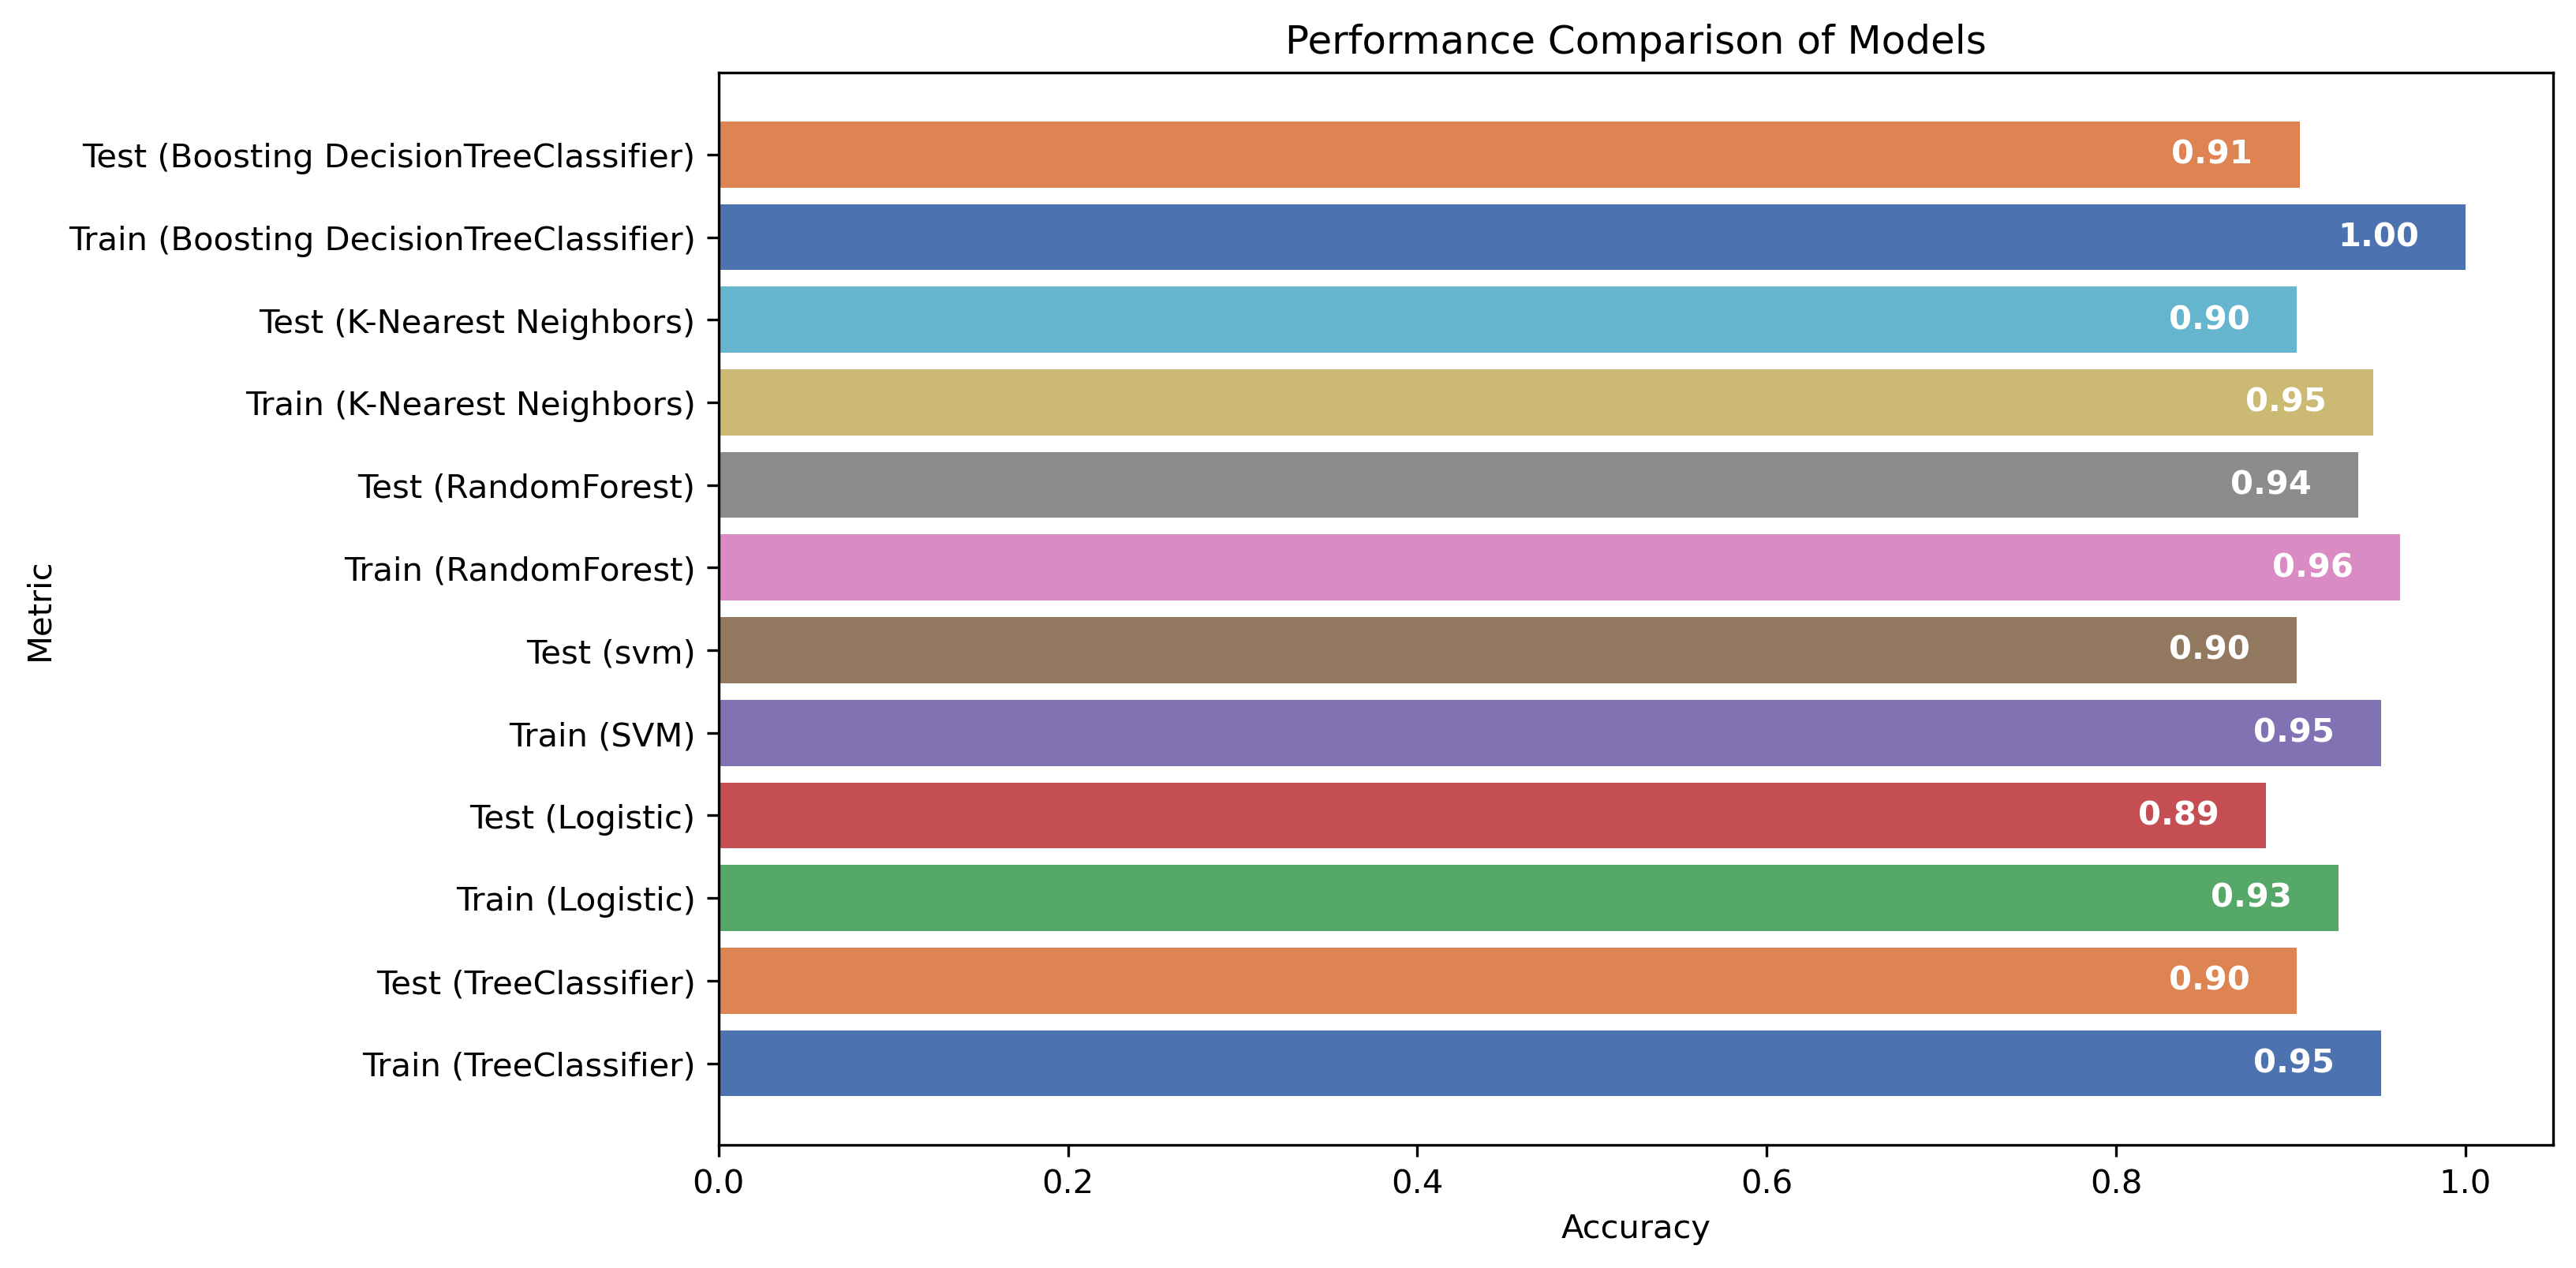

In [195]:
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 데이터프레임 생성
data = {
    'Metric': ['Train (TreeClassifier)', 'Test (TreeClassifier)', 
               'Train (Logistic)', 'Test (Logistic)', 
               'Train (SVM)', 'Test (svm)', 
               'Train (RandomForest)', 'Test (RandomForest)', 
               'Train (K-Nearest Neighbors)', 'Test (K-Nearest Neighbors)', 'Train (Boosting DecisionTreeClassifier)', 'Test (Boosting DecisionTreeClassifier)', ],
    'Accuracy': [train_accuracy_weak, test_accuracy_weak, tr_acc_list[1], te_acc_list[1], tr_acc_list[2], te_acc_list[2], 
                 tr_acc_list[3], te_acc_list[3], tr_acc_list[4], te_acc_list[4], train_accuracy, test_accuracy]
}
df = pd.DataFrame(data)

# 데이터프레임 출력
print(df)

# 성능 비교 막대 그래프
colors = palette
plt.figure(figsize=(10, 6), dpi =300)
bars = plt.barh(df['Metric'], df['Accuracy'], color=colors)

# 각 막대에 값 레이블 추가
for bar in bars:
    plt.text(bar.get_width() - 0.05, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='center', color='white', fontweight='bold')

plt.title('Performance Comparison of Models')
plt.xlabel('Accuracy')
plt.ylabel('Metric')
plt.show()



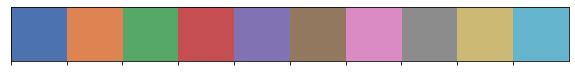

In [111]:
import seaborn as sns

palette = sns.color_palette('deep')
sns.palplot(palette)

         Train Accuracy (Weak)  Test Accuracy (Weak)  \
Model A                   0.85                  0.80   
Model B                   0.88                  0.83   
Model C                   0.82                  0.78   
Model D                   0.84                  0.79   

         Train Accuracy (Boosting)  Test Accuracy (Boosting)  
Model A                       0.95                      0.90  
Model B                       0.92                      0.89  
Model C                       0.88                      0.85  
Model D                       0.90                      0.87  


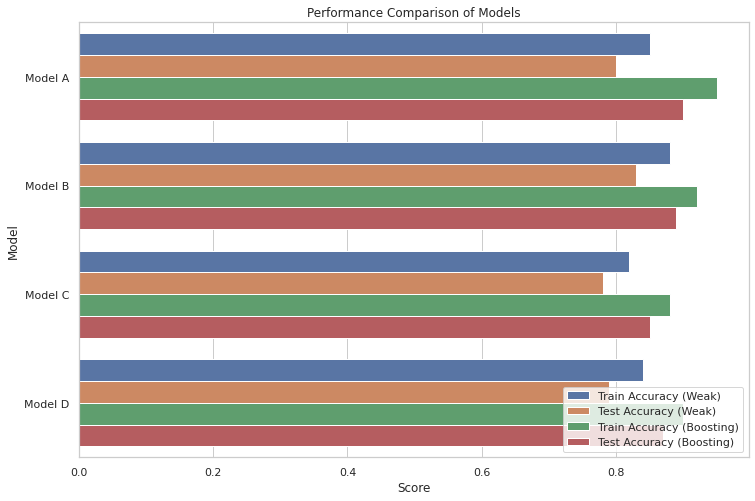

In [685]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 (여기에 실제 데이터를 넣으세요)
train_accuracy_weak = [0.85, 0.88, 0.82, 0.84]
test_accuracy_weak = [0.80, 0.83, 0.78, 0.79]
train_accuracy = [0.95, 0.92, 0.88, 0.90]
test_accuracy = [0.90, 0.89, 0.85, 0.87]

# 데이터프레임 생성
data = np.array([train_accuracy_weak, test_accuracy_weak, train_accuracy, test_accuracy]).reshape(-1, 4)
df = pd.DataFrame(data.T, columns=['Train Accuracy (Weak)', 'Test Accuracy (Weak)', 'Train Accuracy (Boosting)', 'Test Accuracy (Boosting)'], index=['Model A', 'Model B', 'Model C', 'Model D'])

# 데이터프레임 출력
print(df)

# 데이터를 길게 변형
df_melt = pd.melt(df.reset_index(), id_vars="index", var_name="Metric", value_name="Value")
df_melt.rename(columns={'index': 'Model'}, inplace=True)

# 성능 비교 막대 그래프
plt.figure(figsize=(12, 8))
sns.barplot(x="Value", y="Model", hue="Metric", data=df_melt)
plt.title('Performance Comparison of Models')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(loc='lower right')
plt.show()
